# 1) (a ) Plot the sigmoid function.

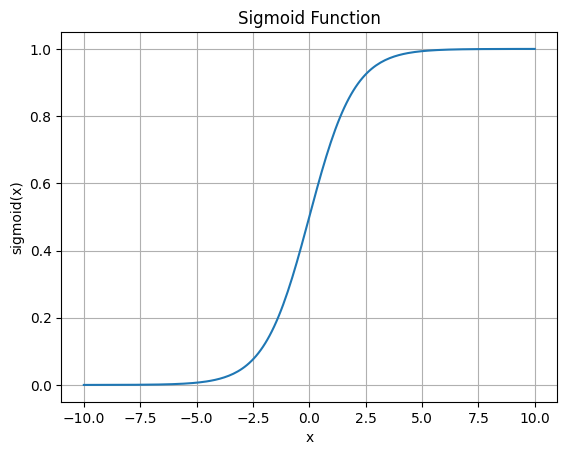

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# a range of values from -10 to 10 to plot
x_values = np.linspace(-10, 10, 200)
# the sigmoid function to these values
y_values = sigmoid(x_values)

# Plotting the function
plt.plot(x_values, y_values)
plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.grid(True)
plt.show()


# Print your interpretation on why this function is useful for a classification problem.

The cause of the sigmoid function used for classification:

    Output Range: The sigmoid function’s output range is (0,1), this helps for binary classification where we need probabilities to determine class member.
    
    Differentiable: It is differentiable, which allows for the use of gradient-based optimization methods.
    
    Monotonic: Its monotonic property ensures that higher values of input will correspond to higher output probabilities.
    
    Gradient Values: The function has significant gradients around the center (x=0), which means small changes in x will result in larger changes in the output probability.

# (b) Plot the log functions in the cost function individually.

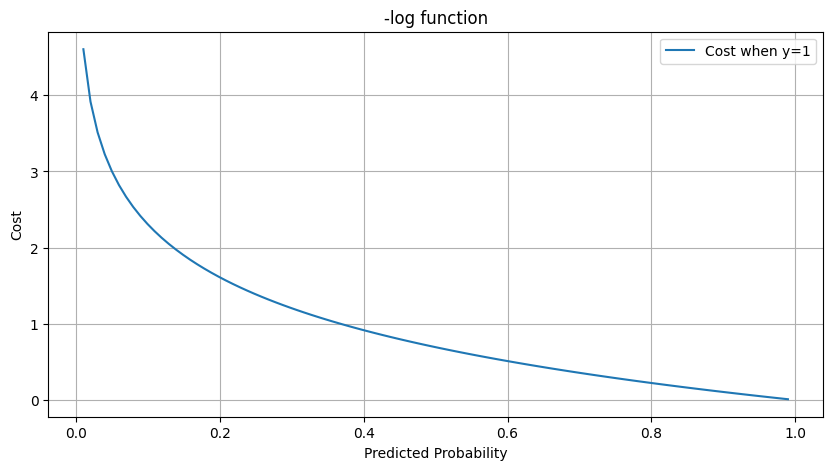

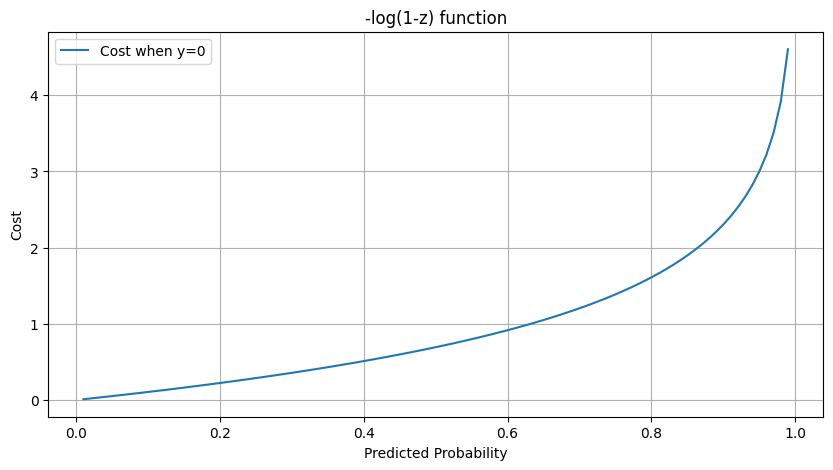

In [5]:
# the range of predicted probabilities
x = np.linspace(0.01, 0.99, 100)

# the negative log loss for y=1 and y=0
log_loss_y1 = -np.log(x)
log_loss_y0 = -np.log(1 - x)

# Plotting the log loss for y=1
plt.figure(figsize=(10, 5))
plt.plot(x, log_loss_y1, label='Cost when y=1')
plt.title('-log function')
plt.xlabel('Predicted Probability')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the log loss for y=0
plt.figure(figsize=(10, 5))
plt.plot(x, log_loss_y0, label='Cost when y=0')
plt.title('-log(1-z) function')
plt.xlabel('Predicted Probability')
plt.ylabel('Cost')
plt.legend()
plt.grid(True)
plt.show()


# Print your interpretation of the log functions

The logarithmic functions in the cost function has the following properties:

    Penalize Wrong Predictions: They heavily penalize predictions that are confident but wrong. For instance, if the actual class is 1 but the model predicts a probability close to 0, the cost will be very high due to the (-log ) term.
    
    Smooth Gradient Descent: The logarithmic nature gives a smooth gradient descent process because the cost function is convex for logistic regression.
    
    Probability Interpretation: The log functions transform the output of the hypothesis into a probability measure, which is essential for classification.

# c) Using your own data for a single feature problem, and assuming linear regression problem, plot the cost function and the corresponding contours. 

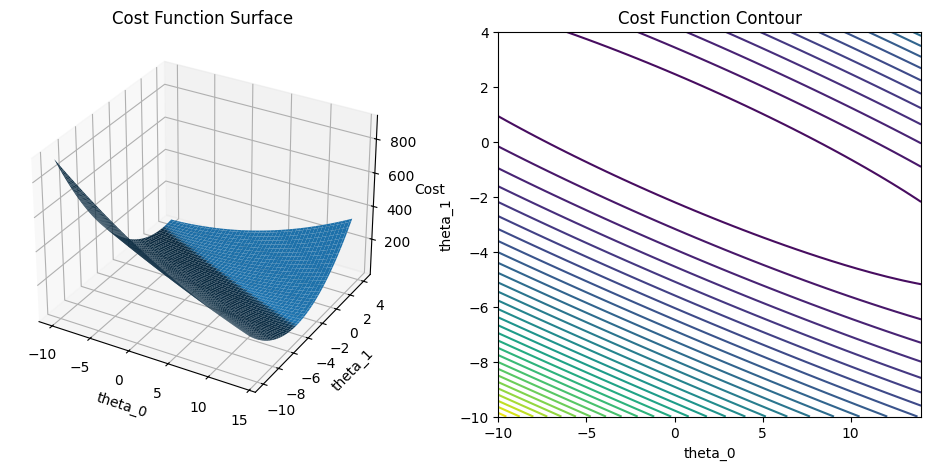

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([0, 1, 0, 0, 1])

# Hypothesis function
def hypothesis(theta_0, theta_1, x):
    return theta_0 + theta_1 * x

# Cost function to handle scalar theta_0 and theta_1
def compute_cost(theta_0, theta_1, x, y):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(theta_0, theta_1, x) - y)**2)

# a grid of values for theta_0 and theta_1
theta_0_vals = np.linspace(-10, 14, 100)
theta_1_vals = np.linspace(-10, 4, 100)
T0, T1 = np.meshgrid(theta_0_vals, theta_1_vals)  #T0 and T1 are of shape 100 x 100


# Initialize J_vals to a matrix of zeros
J_vals = np.zeros(T0.shape)

# Compute the cost for each combination of theta_0 and theta_1
for i in range(T0.shape[0]):
    for j in range(T0.shape[1]):
        J_vals[i, j] = compute_cost(T0[i, j], T1[i, j], x, y)

# Plotting the surface
fig = plt.figure(figsize=(12, 5))

# Left plot - 3D surface
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(T0, T1, J_vals)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('Cost')
ax.set_title('Cost Function Surface')

# Right plot - Contour
ax = fig.add_subplot(1, 2, 2)
contour = ax.contour(T0, T1, J_vals, 30)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_title('Cost Function Contour')

plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#cost fynction
def cost_func(X,y,wb):
    m = len(y)
    pred = X.dot(wb)
    cost = 1/(2*m) * np.sum(np.square(pred - y))
    return cost

# gradient descent rule
def grad_descent(X,y,wb,eta,iterations):
    m = len(y)
    cost_path = np.zeros(iterations)
    for i in range(iterations):
        grad = (1/m) * X.T.dot(X.dot(wb) - y)
        wb = wb - eta * grad
        cost_path[i] = cost_func(X, y, wb)

    return wb, cost_path

In [3]:
x = np.arange(1, 20)
y = (x > 10).astype(int)

# adding a column of ones to x for bias
X_b = np.c_[np.ones((len(x), 1)), x]

# Initial weights
wb_initial = np.zeros((2,))

eta = 0.01  # Learning rate
iterations = 1000

# gradient descent to find the optimal weights
wb_optimal, cost_path = grad_descent(X_b, y, wb_initial, eta, iterations)
print('The final weights are: \n ',wb_optimal)


# the surface and contour plot of the cost function
# initial grid of wb values for plotting
wb0_vals = np.linspace(-12, 0, 100)
wb1_vals = np.linspace(-8, 12, 100)
J_vals = np.zeros((len(wb0_vals), len(wb1_vals)))

# cost for each combination of wb0 and wb1
for i in range(len(wb0_vals)):
    for j in range(len(wb1_vals)):
        t = np.array([[wb0_vals[i]], [wb1_vals[j]]])
        J_vals[i, j] = cost_func(X_b, y, t)

# for meshgrids we need to transpose J_vals
J_vals = J_vals.T

wb0_vals, wb1_vals = np.meshgrid(wb0_vals, wb1_vals)

The final weights are: 
  [-0.28360425  0.07646721]


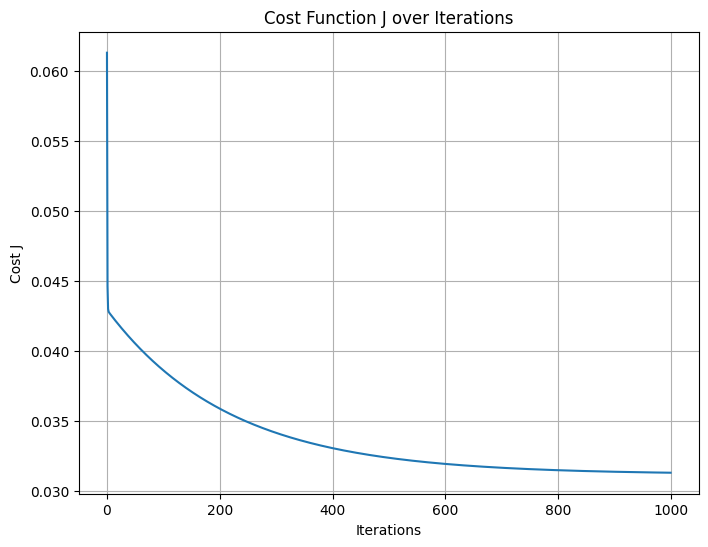

In [4]:
plt.figure(figsize=(8, 6))
plt.plot(cost_path)
plt.title('Cost Function J over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.grid(True)
plt.show()

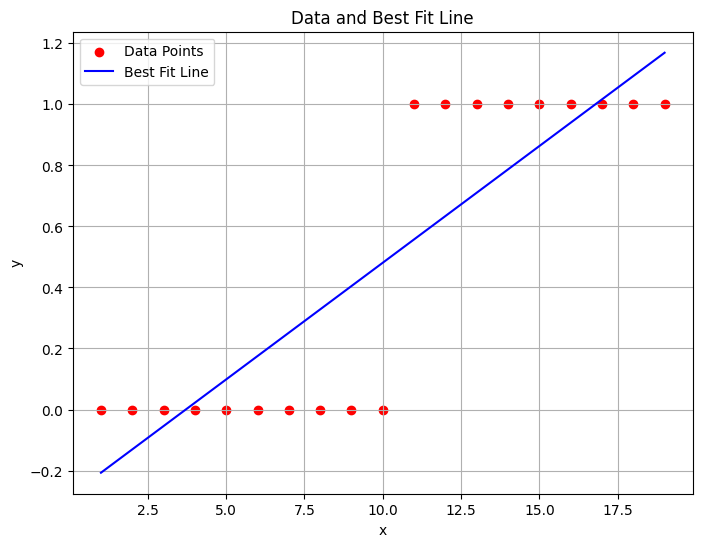

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', marker='o', label='Data Points')
prediction = X_b.dot(wb_optimal)
plt.plot(x, prediction, color='blue', label='Best Fit Line')
plt.title('Data and Best Fit Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Also, using cross entropy as the cost function, plot it as well as its contours.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1, 51)
y = (x > 24).astype(int)
print(y)

X_b = np.c_[np.ones((len(x), 1)), x]  # Adding intercept term

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_func_logistic(X, y, wb):
    m = len(y)
    h = sigmoid(X.dot(wb))
    epsilon = 1e-5  # To prevent log(0)
    cost = -1/m * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
    return cost

In [8]:
def grad_descent_logistic(X, y, wb, eta, iterations):
    m = len(y)
    cost_path = np.zeros(iterations)
    for i in range(iterations):
        grad = (1/m) * X.T.dot(sigmoid(X.dot(wb)) - y)
        wb = wb - eta * grad
        cost_path[i] = cost_func_logistic(X, y, wb)
    return wb, cost_path

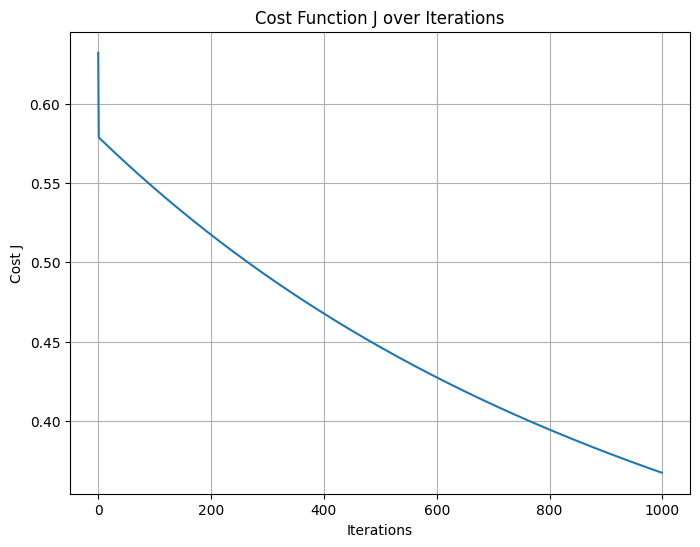

In [9]:
# Initial weights
wb_initial = np.zeros((2,))

eta = 0.01  # Learning rate
iterations = 1000

# Gradient descent
wb_optimal, cost_path = grad_descent_logistic(X_b, y, wb_initial, eta, iterations)

# Plot cost function over iterations
plt.figure(figsize=(8, 6))
plt.plot(cost_path)
plt.title('Cost Function J over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost J')
plt.grid(True)
plt.show()

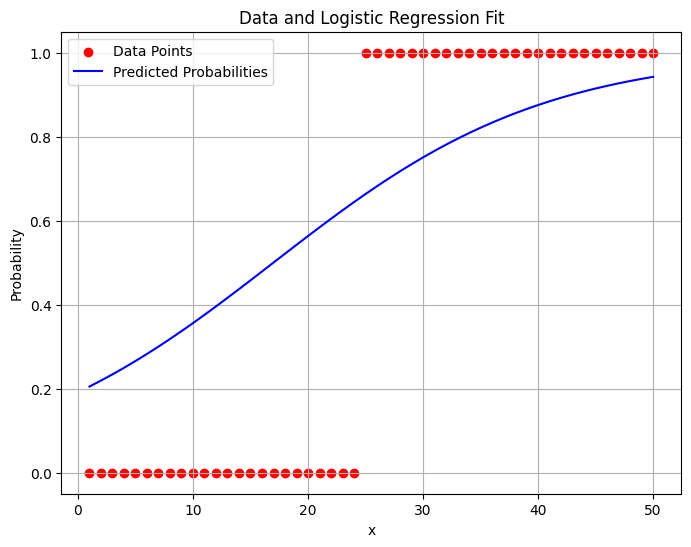

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='red', marker='o', label='Data Points')
prediction_prob = sigmoid(X_b.dot(wb_optimal))
plt.plot(x, prediction_prob, color = 'blue', label='Predicted Probabilities')
plt.title('Data and Logistic Regression Fit')
plt.xlabel('x')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

In [111]:
# Grid of weight values for plotting
wb0_vals = np.linspace(-10, 10, 100)
wb1_vals = np.linspace(-10, 10, 100)
J_vals = np.zeros((len(wb0_vals), len(wb1_vals)))

# Calculate cost for each combination of wb0 and wb1
for i in range(len(wb0_vals)):
    for j in range(len(wb1_vals)):
        t = np.array([wb0_vals[i], wb1_vals[j]])
        J_vals[i, j] = cost_func_logistic(X_b, y, t)

# Because meshgrid's indexing is different, we need to transpose J_vals
J_vals = J_vals.T

# Generate meshgrid
wb0_vals, wb1_vals = np.meshgrid(wb0_vals, wb1_vals)


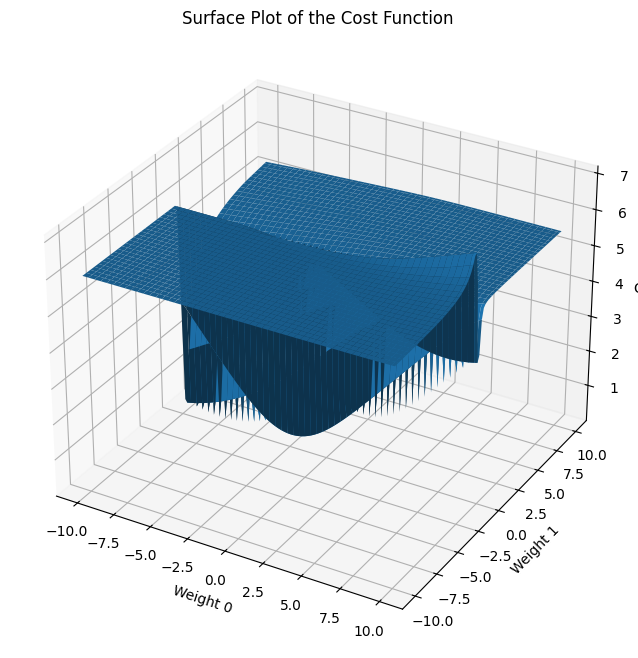

In [112]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(wb0_vals, wb1_vals, J_vals)
ax.set_xlabel('Weight 0')
ax.set_ylabel('Weight 1')
ax.set_zlabel('Cost')
ax.set_title('Surface Plot of the Cost Function')
plt.show()


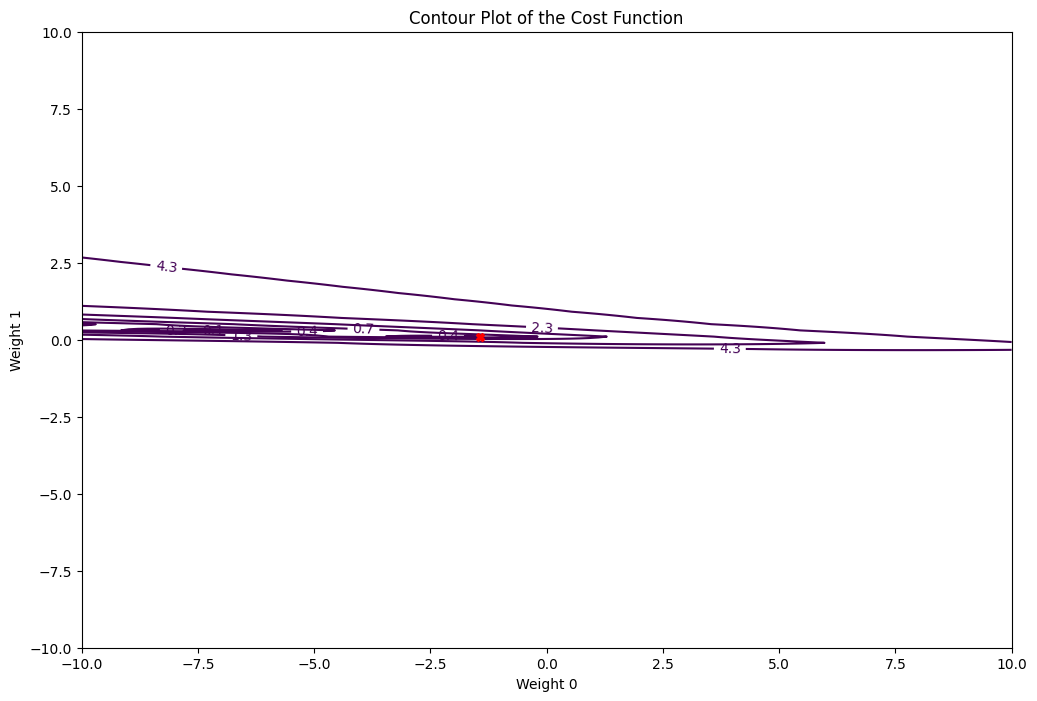

In [113]:
plt.figure(figsize=(12, 8))
contour = plt.contour(wb0_vals, wb1_vals, J_vals, levels=np.logspace(-2, 3, 20), cmap='viridis')
plt.xlabel('Weight 0')
plt.ylabel('Weight 1')
plt.clabel(contour, inline=1, fontsize=10)
plt.title('Contour Plot of the Cost Function')
plt.plot(wb_optimal[0], wb_optimal[1], 'rX')  # Mark the optimal weights
plt.show()